In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.get('data')[:,:2]
y = iris.get('target')

In [3]:
from Library.Clustering import KMeans

KMeans_classifier=KMeans(n_clusters=3).fit(X)

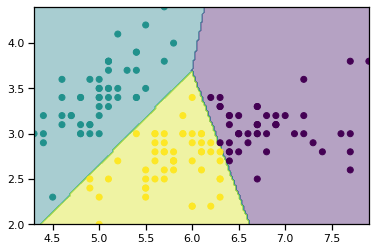

In [4]:
x_min=np.min(X[:,0])
x_max=np.max(X[:,0])
y_min=np.min(X[:,1])
y_max=np.max(X[:,1])

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02), np.arange(y_min,y_max,0.02))
label=KMeans_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
plt.contourf(xx, yy,label.reshape(xx.shape) , alpha=0.4)

plt.scatter(X[:,0],X[:,1],c=KMeans_classifier.labels)


In [5]:
comparasion=pd.DataFrame(np.vstack([y,KMeans_classifier.labels]).T.astype(int),columns=['Actual Category',"Classifer Result"])
table=pd.DataFrame(columns=set(y),index=set(label))
for i in set(label):
    temp=comparasion[comparasion['Classifer Result']==i]
    for j in set(y):
        table[j][i]=len(temp[temp['Actual Category']==j])/(len(temp)+1e-10)
table=table.astype('float')
table

,0,1,2
0,0.0,0.255319,0.744681
1,1.0,0.000000,0.000000
2,0.0,0.716981,0.283019


<AxesSubplot:>

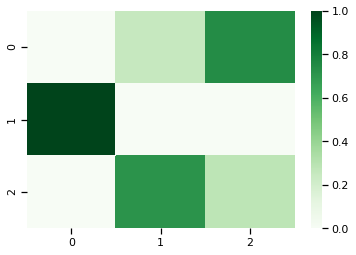

In [6]:
sns.heatmap(table,cmap="Greens")